This notebook is an introduction to keras with tutorial of basic model building. We focus on individual functions to build each layer and their parameters along with examples to practically see their results. More advanced concepts e.g. fine-tuning and data augmentation are explained in future notebooks.

# Introduction to Keras Library

Keras is a deep learning library. Its modular approach and simple design allows us to learn and implement deep learning models easily and quickly. Its design allows us to quickly prototype our models without worrying too much about intricate/complex inner details. Its a high level library, so its synatax is easy to understand.

## Keras Backend
As keras is a high level library, it does not perform low level operations of tensor manipulation e.g. tensor multiplication, addition etc. Rather, it uses third-party specialized libraries to do that. These special libraries are said to be backend engine of keras. From various possible options of keras backend engines: Theano, Tensorflow and CNTK, we can select any one and use it with keras. 

First, we will use keras backend with tensorflow and understand tensor manipulations in it.

### Tensors Manipulation

In [0]:
# Import keras backend to use
from keras import backend as K

We will define three tensors of 5 x 5 shape:
1. Filled with 0s. 
2. Filled with 1s
3. Filled with random values

A simple print statement is not used to show the values of tensor. Keras backend provides get_value function to do that.

In [0]:
zeros_tensor=K.zeros(shape=(5,5))                                        # Initialize a tensor of shape 5 x 5 with all zeros filled
ones_tensor= K.ones(shape=(5,5))                                         # Initialize a tensor of shape 5 x 5 with all ones filled
rand_tensor=K.random_normal_variable(shape=(5,5),mean=0,scale=3)         # Initialize a random tensor of shape 5 x 5 with mean value = 0 and standard deviation = 3

print('zeros tensor: ')
print(K.get_value(zeros_tensor))                                         # Print zeros tensor

print('\nones tensor: ')
print(K.get_value(ones_tensor))                                          # Print ones tensor

print('\nrandom tensor: ')
print(K.get_value(rand_tensor))                                          # Print random tensor

 
print('\nShape of random tensor: ',rand_tensor.shape)                    # Shape of the random tensor

Instructions for updating:
Colocations handled automatically by placer.
zeros tensor: 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

ones tensor: 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

random tensor: 
[[-1.9247348   1.7806361   1.2424654   4.1707      0.03489759]
 [-1.0863552  -1.686175   -3.4082859  -1.1001399   4.92533   ]
 [-0.44365144 -2.1258113   2.6624944  -4.5818515   4.4941826 ]
 [-1.6052155  -1.7099472   2.3560743  -1.282958   -1.2331492 ]
 [ 0.13307902  1.4599998   3.871846    1.0848838  -0.18272676]]

Shape of random tensor:  (5, 5)


Now, we will add two tensors together, subtract two tensors and multiply values of two tensors to understand tensor operations. We can use same arithmetic notations for addition and subtraction. The multiplication sign is a little confusing. 
* For element wise multiplication of two tensors, use **'*'** sign
* For multiplication of two tensors, use **K.dot** function

In [0]:
add_ones_rand = ones_tensor + rand_tensor                                       # Add random tensor with ones tensor
sub_rand_ones = rand_tensor - ones_tensor                                       # Subtract ones tensor from random tensor
mul_ones_rand = ones_tensor * rand_tensor                                       # Element wise multiply ones and random tensor

print('\nAddition : \n',K.get_value(add_ones_rand))
print('\nSubtraction : \n',K.get_value(sub_rand_ones))
print('\nMultiplication: \n',K.get_value(K.dot(ones_tensor,rand_tensor)))
print('\nElement wise Multiply : \n',K.get_value(mul_ones_rand))


Addition : 
 [[-0.92473483  2.780636    2.2424655   5.1707      1.0348976 ]
 [-0.08635521 -0.686175   -2.4082859  -0.10013986  5.92533   ]
 [ 0.55634856 -1.1258113   3.6624944  -3.5818515   5.4941826 ]
 [-0.60521555 -0.7099472   3.3560743  -0.28295803 -0.23314917]
 [ 1.133079    2.4599998   4.871846    2.0848837   0.81727326]]

Subtraction : 
 [[-2.9247348   0.7806361   0.24246538  3.1707     -0.96510243]
 [-2.0863552  -2.6861749  -4.408286   -2.1001399   3.9253302 ]
 [-1.4436514  -3.1258113   1.6624944  -5.5818515   3.4941826 ]
 [-2.6052155  -2.709947    1.3560743  -2.282958   -2.233149  ]
 [-0.86692095  0.4599998   2.871846    0.08488381 -1.1827267 ]]

Multiplication: 
 [[-4.926878  -2.2812977  6.724594  -1.7093655  8.038535 ]
 [-4.926878  -2.2812977  6.724594  -1.7093655  8.038535 ]
 [-4.926878  -2.2812977  6.724594  -1.7093655  8.038535 ]
 [-4.926878  -2.2812977  6.724594  -1.7093655  8.038535 ]
 [-4.926878  -2.2812974  6.724594  -1.7093655  8.038534 ]]

Element wise Multiply : 
 

## Model Building
A deep learning model is a combination of different types of layers (e.g. convolution, pool, fully connected, dropout, activation). In keras, these layers are used as modules and are put together using "model" data structure. 


In keras, we can build our models in two ways:
* Using Sequential API
* Using Functional API

We use sequential API for developing simple models e.g. with no skip connections, no acyclic graphs or multiple outputs. Keras provides 'Sequential' model to put together different modules as a linear stack. For complex architectures (e.g. containing skip connections, cyclic graphs), we use functional API of keras. 

Following are the steps to build a model using Sequential API:

1. First, we define or initialize the model, which means declaring the model as an instance of Sequential Class. This allows us to stack different layers to be used as a model. 

2. We add different layers to our model using ".add()" function. 

3. Then, we compile our model which means, to configure the learning process and includes setting loss function and optimizer for the model or setting learning rate for weight updates during back propagation.

4. We train our model by calling ".fit()" function on our model object. The parameters of fit function include training data, validation data, number of epochs to train the model and batch size.

5. Evaluating the model performance on evaluation dataset. We can set a specific metric ('Accuracy', 'F1 score', 'Precision' etc.) to get results in requried units. 

6. Model Testing on our test set and visualizing the results.

## Layers
Here, we will see how to define different modules(layers) in keras and later, we will learn to stack them using Sequential API of keras.
### Convolutional Layer
We import CNN layers from keras.layers.convolutional. We will consider function for 2D convolution. It has several parameters but we will only discuss the most important ones and relevant to our tutorial here. 

**Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', activation=None, use_bias=True,data_format=None)**

* filters: filters actually tell the number of output channels. Because each filter is trained to look for certain visual feature and outputs a single activation map for that feature. This means, if we have 32 filters, and apply Conv2D on an input tensor, we will get an output tensor with 32 channels.

* kernel_size: Kernel_size is an integer or a tuple that specifies the height and width of convolution window. It is effectively our effective receptive field. A large kernel would mean that the kernel is looking at a larger area of image, while a small kernel size means that it focuses on smaller area at one time. 

* strides: strides is an integer or a tuple that specifies the step for convolution window along height and width. 

* padding: possible padding options are 'valid' and 'same'. With 'same' option, the output tensor has same shape as input tensor as the image is padded before applying Conv2D.

* activation: name of the activation function to be applied on the output of layer. By default, no activation is applied.

* use_bias: True if the layer is to use bias vector and False if not.

* data_format: This is a string value which defines the ordering of input tensor dimensions. "channels_last" corresponds to inputs with shape  (batch, height, width, channels) while "channels_first" corresponds to inputs with shape  (batch, channels, height, width). By default, it will be the value set in ~/.keras/keras.json or "channels_last", if not set in file.

This function takes a 4D tensor as input with shape (batch, channels, height, width).

See the example below of creating a Convolutional 2D layer:

In [0]:
from keras.layers.convolutional import Conv2D                                   # Import Conv2D submodule from keras' convolutional module
from keras import backend as K                                                  # Import keras as backend

# Get a layer with padding = 'valid' and another layer with padding = 'same'
convlayer_validpadding=Conv2D(1, (3,3), strides=(1, 1), padding='valid', activation=None, use_bias=True,data_format="channels_first")
convlayer_samepadding=Conv2D(1, (3,3), strides=(1, 1), padding='same', activation=None, use_bias=True,data_format="channels_first")

We will not initialize a random tensor of batch 1, channel 1, a height and width of 5. We will feed this tensor to our convolution layer and will look at the results. This will help us understand convolution in keras.


In [0]:
# A random tensor of uniform data distribution with shape = (1 x 1 x 5 x 5) with lowest possible value = 0 and highest possible = 255
randomtensor=K.random_uniform_variable(shape=(1,1,5,5),low=0,high=255)
print('Input tensor: \n',K.get_value(randomtensor))

# Pass this random tensor with shape = (1 x 1 x 5 x 5)  to convolutional layer
print('\nConvolution with valid padding: ')
outtensor=convlayer_validpadding(randomtensor)
print('Conv output: \n',K.get_value(outtensor))

# Pass this random tensor with shape = (1 x 1 x 5 x 5)  to convolutional layer
print('\nConvolution with same padding: ')
outtensor=convlayer_samepadding(randomtensor)
print('Conv output: \n',K.get_value(outtensor))

Input tensor: 
 [[[[ 65.76495   81.825356  15.02719   36.95554   32.877327]
   [209.33842   10.329335 159.12941  137.64525  116.365776]
   [240.34006  247.07956   15.511345  55.06701  144.0604  ]
   [204.52391  209.58885  156.07443  155.97627  201.62712 ]
   [ 42.551273  29.56971   41.977715  67.07628  118.80479 ]]]]

Convolution with valid padding: 
Conv output: 
 [[[[ -86.29592   -14.984547  -22.486248]
   [  62.06592   -38.12681  -119.31634 ]
   [ 161.76526   118.06208   -47.397507]]]]

Convolution with same padding: 
Conv output: 
 [[[[  53.43195    -27.072586   -27.5922      -4.6767797  -28.941502 ]
   [  97.45246   -147.2408      32.422558    -1.5409379  -69.10389  ]
   [ 136.74294   -132.81952   -147.16383    -45.018234  -103.6035   ]
   [ 169.78822   -172.38379   -129.70387     61.254646   -84.2743   ]
   [  39.110954  -116.932816   -85.53351    -20.845926  -126.87508  ]]]]


We can see from output above that our output tensor has less width and height in valid padding while we have same width and height in case of same padding.

### Pooling Layer
We import pooling layers from keras.layers. We will consider function for MaxPooling2D as we are working with images, for now. The function parameters are same for AveragePooling2D. 

**MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')**
* pool_size: It is the window size that is actually effective receptive field. It is an integer value or a tuple of 2 integers specifying the factors to downscale the input tensor in width and height. A pool_size of (2, 2) will halve the input in both spatial dimension. For a single integer, the same window length will be used for both dimensions.
* strides: It defines the steps in width and height dimensions after each operation. It is an integer value or a tuple of 2 integers. If strides=None, the default value used will be pool_size.
* padding: It can either be "same" or "valid". If the height and width of input tensor are perfectly divisible by pool_size, we will have same output for "same" and "valid" options. But, the outputs will be different in other cases. We will mostly use "valid" option in our deep learning models.
* data_format: Same as in convolutional layer. It can be "channels_first" specifying that the input tensor will have channels as first dimension or "channels_last" specifying that the input tensor will have channels as last dimension.

In [0]:
from keras.layers import MaxPooling2D                                           # Import MaxPooling2D submodule from keras' layers module
from keras import backend as K                                                  # Import keras backend

# Intialize two pooling layers: one with 'valid' padding and the other with 'same' padding
poollayer_validpadding=MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format="channels_first")
poollayer_samepadding=MaxPooling2D(pool_size=(2, 2), strides=None, padding='same',data_format="channels_first")

# Intiailize a random tensor with lowest value = 0 and highest value = 255
randomtensor=K.random_uniform_variable(shape=(1,1,5,5),low=0,high=255)
print('Input tensor: \n',K.get_value(randomtensor))

# Pass random tensor to pooling layer with valid padding
print('\nMaxpool with valid padding: ')
outtensor=poollayer_validpadding(randomtensor)
print('Conv output: \n',K.get_value(outtensor))

# Pass random tensor to pooling layer with same padding
print('\nMaxpool with same padding: ')
outtensor=poollayer_samepadding(randomtensor)
print('Maxpool output: \n',K.get_value(outtensor))

Input tensor: 
 [[[[ 88.08201  254.96082  235.22987   32.803852 237.5966  ]
   [ 81.94276  105.93904   27.282171  45.248062 166.89757 ]
   [200.07713  245.2447   178.40118   28.157705  49.7963  ]
   [ 37.316795 183.24231   39.885426  98.707184  84.3887  ]
   [159.07239   17.028164 120.70368   52.929123  69.96987 ]]]]

Maxpool with valid padding: 
Conv output: 
 [[[[254.96082 235.22987]
   [245.2447  178.40118]]]]

Maxpool with same padding: 
Maxpool output: 
 [[[[254.96082 235.22987 237.5966 ]
   [245.2447  178.40118  84.3887 ]
   [159.07239 120.70368  69.96987]]]]


### Activation
Activations are applied on the output of our model layers. Activations can be applied through activation layer provided by keras.layers.core submodule of keras or activation parameter (or argument) supported by each layer. The activations are also provided through keras.activations submodule.

We only specify the name of the activation function as the parameter:

**Activation(activation)**

* activation: We can choose from several available activation functions: 'relu', 'softmax','tanh','sigmoid','exponential','linear' and more.

Following are examples of two activation functions: RELU and Softmax. For softmax, we need to define the axis along which to apply the activation.

Keras also provides some advanced activation functions which can learn parameters but these are out of scope for this tutorial.

In [0]:
from keras.layers.core import Activation                                        # Import Activation submodule from keras layers.core module
from keras import backend as K                                                  # Import keras backend

randomtensor=K.random_uniform_variable(shape=(1,1,5,5),low=-2,high=5)           # A random uniform distribution tensor with lowest possible value = -2 and highest possible = 5
reluactivation=Activation('relu')                                               # Intialize relu activation 
print('\n\t\t\tRELU ACTIVATION')
print('Input tensor: \n',K.get_value(randomtensor))

outtensor=reluactivation(randomtensor)                                          # Pass random tensor to relu activation to see its effects
print('\nRelu Activation output: \n',K.get_value(outtensor))

print('-'*70)
print('\n\t\t\tSoftmax Activation')
randomtensor=K.random_uniform_variable(shape=(1,1,1,6),low=-2,high=5)           # random uniform distribution tensor of shape (1 x 1 x 1 x 6), lowest possible value = -2 and highest possible = 5
print('Input tensor: \n',K.get_value(randomtensor))
softmaxactivation=Activation('softmax')                                         # Initializing softmax activation
outtensor=softmaxactivation(randomtensor)                                       # Passing random tensor to softmax activation layer
print('\nSoftmax Activation output: \n',K.get_value(outtensor))



			RELU ACTIVATION
Input tensor: 
 [[[[ 2.0705428   4.8187284   1.7726908   4.627082   -1.7312672 ]
   [ 4.862919    4.722542   -0.840021    4.540087    1.2682633 ]
   [-0.36543572  3.1376042   2.9521737   2.066959   -1.3211952 ]
   [ 0.13226175  1.7998643   2.1514082   3.2197514   1.1830635 ]
   [ 2.38314     3.0333805   1.1642089   4.0897436   4.6930127 ]]]]

Relu Activation output: 
 [[[[2.0705428  4.8187284  1.7726908  4.627082   0.        ]
   [4.862919   4.722542   0.         4.540087   1.2682633 ]
   [0.         3.1376042  2.9521737  2.066959   0.        ]
   [0.13226175 1.7998643  2.1514082  3.2197514  1.1830635 ]
   [2.38314    3.0333805  1.1642089  4.0897436  4.6930127 ]]]]
----------------------------------------------------------------------

			Softmax Activation
Input tensor: 
 [[[[ 1.2252657   0.3615985   0.20155334 -0.65938103  4.581312
    -0.3194884 ]]]]

Softmax Activation output: 
 [[[[0.03244466 0.01367909 0.01165603 0.00492778 0.9303699  0.00692253]]]]


As we know that relu sets all negative values to zero and the rest of values remain same (as also shown in figure below), we can understand our output results now.
<img src="images/relu.jpg" alt="Drawing" style="width: 400px;"/>

And for softmax, it takes a vector of real numbers and normalizes the values into a probability distribution.

### Dense Layer
We import dense layer from keras.layers.core submodule of keras. The parameters for dense layer are follows:

**Dense(units, activation=None, use_bias=True)**

* units: Number of neurons in the layer or number of dimensions in output.
* activation: Activation function to be applied to dense layer output. If this is None, then no activation is applied.
* use_bias: True if we want to use bias vector

An input tensor is flattened before feeding into dense layer if its rank is greater than 2.

In [0]:
from keras.layers.core import Dense, Flatten                                    # Import Dense and Flatten submodule from keras layers.core module
from keras import backend as K                                                  # Import keras backend

flatteninput=Flatten()
denselayer=Dense(16)

randomtensor=K.random_uniform_variable(shape=(1,1,5,5),low=0,high=255)          # A random tensor with lowest value = 0 and highest value = 255

print('Input tensor shape: ',randomtensor.shape,'\n',K.get_value(randomtensor))

outtensor=denselayer(flatteninput(randomtensor))                                # Flatten the input tensor
print('\nOutput shape: ',outtensor.shape)
 
print('Dense Layer output: \n',K.get_value(outtensor))


Input tensor shape:  (1, 1, 5, 5) 
 [[[[116.745514  46.895596 172.45409  111.540245 183.3954  ]
   [ 96.42691   78.021065 225.5935    60.60836   18.71512 ]
   [ 85.22155   34.107853 170.36714  206.2946   103.72082 ]
   [ 64.65709  102.414566  20.466675 194.40715  159.80948 ]
   [138.83682  249.53848   15.266547  18.376392 138.70067 ]]]]

Output shape:  (1, 16)
Dense Layer output: 
 [[ -42.4599     71.85665   142.94595   157.31287    -8.780102 -126.94177
    32.009853  119.2424    119.61725    73.246895 -164.97363   108.78273
  -307.54883   -70.09828   318.86188    -4.682003]]


## Model Building
The layers that have just covered are basic building blocks of a deep learning model. Now, we will stack them or combine them together to build our deep learning models. For now, we will build a simple model to help us understand the concept of deep learning models. Then, we will move to actual training model for classification tasks.

Here, we will build a model of: 
1. 1 Convolutional Layer
2. 1 Activation function
3. 1 Maxpool layer
4. 1 Dense Layer
5. 1 Final softmax layer

Final Dense layer has neurons equal to the number of classes and the output of the final layer in a model is called logits. In our example, we will have a dense layer of 2 neurons (because we are building a model to classify between two classes)

In [0]:

from keras.models import Sequential                                             # First we import Sequential datastructure of keras
from keras.layers.core import Dense, Activation, Flatten                        # Import Dense, Activation and Flatten submodules from layers.core module of keras
from keras.layers.convolutional import Conv2D                                   # Import Conv2D submodule
from keras.layers import MaxPooling2D                                           # Import MaxPooling2D submodule
from keras import backend as K                                                  # Import keras backend


# We define our model as an instance of the data structure 
model = Sequential()

# Now, we will add layers to the model. First, we add convolutional layer with no activation and padding = 'valid'
model.add(Conv2D(8, (3,3), strides=(1, 1), padding='valid', activation=None, use_bias=True,data_format="channels_first"))

# Add relu activation
model.add(Activation('relu'))

# Add maxpooling layer with padding='valid'
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format="channels_first"))

# Here, we will have 3 dimensional tensor of some size. For Dense layer, we will flatten it out. 
model.add(Flatten())

# Dense layer with 2 output units
model.add(Dense(2,use_bias=True))

# Softmax activation function
model.add(Activation('softmax'))


### Model Summary
Keras provides a method 'summary' to get the summary representation of our model. It lists down the layers of our model, their output shape and learnable parameters in each layer. To get the summary of a model, we either need to specify the input shape in the first layer of model or build the model with a specific input shape.
For example, summary of our model is given below:

In [0]:
model.build(input_shape=(1,3,64,64))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (1, 8, 62, 62)            224       
_________________________________________________________________
activation_3 (Activation)    (1, 8, 62, 62)            0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (1, 8, 31, 31)            0         
_________________________________________________________________
flatten_2 (Flatten)          (1, 7688)                 0         
_________________________________________________________________
dense_2 (Dense)              (1, 2)                    15378     
_________________________________________________________________
activation_4 (Activation)    (1, 2)                    0         
Total params: 15,602
Trainable params: 15,602
Non-trainable params: 0
_________________________________________________________________


1. As our convolution layer has 8 kernels. Each kernel has a width and a height of 3 and depth of kernel is influenced by the number of channels in input tensor. In our case, our images has 3 channels and so, our each kernel has a total dimensions of (3 x 3 x 3). We need to train each value in each tensor to look for certain pattterns in the image and therefore we have tatal trainable parameters: **(3 * 3 * 3) * 8 + 8(bias vector) = 224**.


2. The output from flatten_2 layer is 7688 length vector. The Dense layer (dense_2) is a fully connected layer and has 2 neurons. Thus, the total parameters for dense layer are: **7688 * 2 (7688 connections from previous layer to each neuron) + 2 (bias units) = 15378**

**Model Execution**

In [0]:
# Now that we have built our model, we would like to see how a certain input tensor will be transformed 
# if passed through this model

inputtensor=K.random_normal_variable(shape=(1,3,64,64),mean=0,scale=13)         # Random uniform variable of shape (1 x 3 x 64 x 64) with mean = 0 and standard deviation = 13
output=model(inputtensor)                                                       # Pass this random tensor to model
print('output shape: ',output.shape)
print('output values: \n',K.get_value(output)[0])

output shape:  (1, 2)
output values: 
 [2.8046618e-14 1.0000000e+00]


As you can see we have output of 2 values, both sum up to 1.0, which results from softmax activation.

## Model Compiling
All the examples that we have covered so far did not include any training. Layers were initialized and were used to process our input tensors. The weights or values of kernels were preinitialized. But to solve oiur problems, we want our kenel windows to look for specific patterns in input data and base their results on that. As we have already discussed how model training works in theoretical part, we will cover model training steps using keras here.

After building our model, we need to compile it which means, we need to configure the learning process for our model which includes choosing loss function, learning rate, optimizer for weights updates etc. Keras provides compile function and some of the important arguments are mentioned here:

**compile(optimizer, loss=None, metrics=None, loss_weights=None)**

* optimizer: It can be a string value defining the name of optimizer or and instance of optimizer class. Keras provides a number of optimizers to choose from e.g. RMSProp, SGD, Adagrad, AdaDelta, Adam etc.
* loss: It can be a string value defining the name of loss function to use or can be a defined objective function. Keras provides some loss functions: 'mean_squared_error','mean_absolute_error', 'binary_crossentropy', 'categorical_crossentropy' etc.
* metrics: Metric quantifies the fitness of model to our data i.e. it measures how well the model fits the data. It can be a list of metrics that the model evaluates during training and testing. 
* loss_weights: For multiple classes, we can assign different weights to different classes. It essentially means that a small loss value in one class would be penalized more than same value loss for any other class. This is particularly important for training on imbalanced dataset.

Consider the configurations below where we have used categorical_crossentropy loss, accuracy metric and rmsprop optimizer for our model.



In [0]:
Compile the built model (configure the learning process of the model) by specifying the optimizer used, loss used and metrics
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='rmsprop')

## Data Building
Now, we have our built our model completely. To train this model, we need data. We will use some real world data later, but for our understanding, we will randomly generate some input tensors and will train our model. In this part, we will focus on learning how to feed data to a model.

We will build a dummy data with 1000 random images of (64 x 64 x 3) dimension each. We have built a binary classifier model, which means that it can classify 2 classes and so, to use this model, we will somehow label these random images to 2 classes. Just for learning, we have used the mean of the sum of pixel values to assign classes to each image. Following are the steps:

1. Sum of each image along all dimensions (64 x 64 x 3) is calculated.
2. Mean of sums is calculated.
3. All values greater or equal to mean are assigned class 1 while the rest are assigned class 0.
3. The class numbers are converted into one hot encoding (which is required format to be used to train the model).


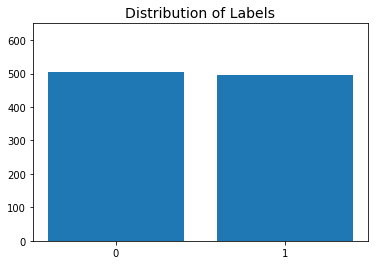

X shape:  (1000, 3, 64, 64)
Labels shape:  (1000,)


In [0]:
import numpy as np                                                              # Import numpy library
from keras.utils import to_categorical                                          # To preprocess the data. to_categorical is used to get data in one-hot encoding form
import matplotlib.pyplot as plt                                                 # Pyplot module of matplotlib

totalsamples=1000                                                               # Number of total data points
#X=np.random.randint(low=0,high=255,size=(totalsamples,3,5,5))
X=np.random.uniform(low=0.0,high=1.0,size=(totalsamples,3,64,64))*255           # random uniform sample
X=X.astype(int)
sums=X.sum(axis=tuple(range(1,X.ndim)))                                         # Sum across all values of X across dimension = 1
mean=np.mean(sums)                                                              # Find all values sums

labels=np.zeros(shape=sums.shape,dtype=int)
labels[sums>=mean]=1                                                            # Shortlist all the sums greater than mean

# To show the distribution of our classes
plt.figure('Figure')
plt.title('Distribution of Labels',fontsize=14)

l, counts = np.unique(labels, return_counts=True)                               # Find unique numbers
plt.bar(l, counts, align='center')                                              # Plot a bar of the counts that I have put in
plt.gca().set_xticks(l)
plt.ylim(0,650)
plt.show()

print('X shape: ',X.shape)
print('Labels shape: ',labels.shape)


X shape values are as (batchsize,channels,height,width)

### One Hot Encoding
To train our model, we need to provide our input images and their labels in correct format. Our images have 2 classes (0 and 1) and so, our labels are integer encoded (numbered 0 and 1). One hot encoding is used to represent our categorical variables as binary vectors(in the form of 0s and 1s). The length of the vector is equal to the number of classes. For a label integer, the binary vector has a 1 at the index of value and 0s at all other positions. To better understand this, consider following example:

We have 5 classes: {0,1,2,3,4}
We can represent each of those values as a binary vector of length 5. Following are their binary vectors:

* 0: [1,0,0,0,0]
* 1: [0,1,0,0,0]
* 2: [0,0,1,0,0]
* 3: [0,0,0,1,0]
* 4: [0,0,0,0,1]

As you can see, all the values in a vector are 0 with 1 at the index position of that value. 

We can write custom code using numpy to get one hot encoded vectors or we can use keras library to do that.


In [0]:
# In this cell, we will build one hot encoded vectors for categorical classes
import numpy as np                                                              #Import numpy library
classes=[0,1,2,3,4]                                                             # Total 5 classes
for c in classes:
    one_hot=np.zeros(shape=(len(classes)))                                      # A one hot encoded form of classes
    one_hot[c]=1
    print('Class',c,': ',one_hot)
print('\n')
# Now, let's take another example of categorical variables
classes=['red','green','blue','orange','yellow','purple','indigo']
for idx,c in enumerate(classes):
    one_hot=np.zeros(shape=(len(classes)))
    one_hot[idx]=1
    print('%5s %7s %s %15s '%('Class',c,':',one_hot) )
    #print('Class',c,': ',one_hot)

Class 0 :  [1. 0. 0. 0. 0.]
Class 1 :  [0. 1. 0. 0. 0.]
Class 2 :  [0. 0. 1. 0. 0.]
Class 3 :  [0. 0. 0. 1. 0.]
Class 4 :  [0. 0. 0. 0. 1.]


Class     red : [1. 0. 0. 0. 0. 0. 0.] 
Class   green : [0. 1. 0. 0. 0. 0. 0.] 
Class    blue : [0. 0. 1. 0. 0. 0. 0.] 
Class  orange : [0. 0. 0. 1. 0. 0. 0.] 
Class  yellow : [0. 0. 0. 0. 1. 0. 0.] 
Class  purple : [0. 0. 0. 0. 0. 1. 0.] 
Class  indigo : [0. 0. 0. 0. 0. 0. 1.] 


In [0]:
# Keras provides one line solution for this. So, we will use to_categorical to get our labels 
# converted to one-hot encoding
one_hot_labels=to_categorical(labels)

Now we have 1000 input tensors and their labels to train our model. Before that, we will split our data into train, validation and test data. So, we can validate our results on the go and later test it. First, we will use sklearn's train_test_split function to split our data into train and test parts, then we will further divide the train set into train and validation set.

In [0]:
from sklearn.model_selection import train_test_split

# Following function will randomly shuffle our data and will split it into 80 - 20 percents(train and test data)
X_train,X_test,y_train,y_test=train_test_split(X,one_hot_labels,test_size=0.2,random_state=17)

# Following function will divide train set into 90 - 10 split of train and validation set.
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=43)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_val shape  : ',X_val.shape)
print('y_val shape  : ',y_val.shape)

print('X_test shape : ',X_test.shape)
print('y_test shape : ',y_test.shape)


X_train shape:  (720, 3, 64, 64)
y_train shape:  (720, 2)
X_val shape  :  (80, 3, 64, 64)
y_val shape  :  (80, 2)
X_test shape :  (200, 3, 64, 64)
y_test shape :  (200, 2)


## Model Training
To train a model, we call "fit" function of the model. 

**fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)**


* x: It is a numpy array of input training data e.g. images. In our case, it will contain our input tensors.
* y: It is also a numpy array of training data labels. In our case, it will contain one hot encoded vectors.
* batch_size: Number of samples provided to model for each run and for gradient calculation.
* epochs: Number of epoch represents the number of times, model will iterate through complete dataset. For example, epochs = 10 means that the model will iterate through the dataset 10 times.
* verbose: If verbose=1, in-between epochs results will be printed.
* callbacks: Function callbacks during training or validation. This is a list of functions that will be called during training or validation.
* validation_split: This is a value between 0 and 1. It represents the percentage of training data to be used for validation.
* validation_data: It is a tuple containing validation input data and labels (Xval,Yval). The model will be evaluated on this data after each epoch.
* shuffle: It is a boolean value. If shuffle=True, the data will be randomly shuffled before each iteration/epoch.
* initial_epoch: Epoch number to start the training from. It is useful to resume a previous training. 

This fit function returns a history object that contains records of training and validation losses and metrics values at successive epochs. Through this history object, we can visualize the losses and accuracies by plots.

In [0]:
history= model.fit(x=X_train,y=y_train,batch_size=1,epochs=2,verbose=1,validation_data=(X_val,y_val),shuffle=True)

We trained the model for 2 epochs. Our validation results remained the same while our training accuracy increased and our training loss decreased a little. 

In [0]:
# This function will take history/output from train/test function.
def summarize_stats(history,title):
    # loss 
    plt.figure(figsize=(16,4))                                                  # Set figure size
    plt.subplot(1,2,1)                                                          # Add subplots
    plt.suptitle(title,fontsize=18)                                             # Add suptitle
    plt.title('Loss',fontsize=16)                                               # Get a figure for loss
    plt.plot(history.history['loss'], color='red', label='Train')               # Plot history of the training/testing
    plt.plot(history.history['val_loss'], color='blue', label='Test')
    plt.legend(loc='upper right')
    # accuracy
    plt.subplot(1,2,2)
    plt.title('Classification Accuracy',fontsize=16)                            # Figure of classification accuracy
    plt.plot(history.history['acc'], color='red', label='Train')                # Plot accuracy from history plot
    plt.plot(history.history['val_acc'], color='blue', label='Test')            # Plot validation accuracy

    plt.legend(loc='lower right')
    plt.show()


summarize_stats(history,'Reuslts')


## Pretrained Models and Fine Tuning
A deep learning model requires huge amount of data to train well and usually, for our particular problem, we only have access to a small dataset. If we train our model from scratch with randomly initialized weights, the model will most likely overfit the training set. To tackle this problem, we use models that have been pretrained on some large dataset and then we intialize our layers with weights of those models. This process is called fine-tuning. In finetuning, we tune the network parameters/weights of an already trained model so it can adapt to the new task. Initial layers in a model learn general features while last layers learn features specific to our task e.g. initial layers might learn circular edges, horizontal or vertical edges while last layers learn specific features like the shape of nose, lips, ear etc. Therefore, in finetuning, we only train the last few layers and freeze the initial layers. 
To fine-tune a model, we replace last few layers to get our required number of classes as output and then we train the complete model. Keras provides models pretrained on ImageNet which we can use for our tasks. Some of those models are: VGG16, VGG19, InceptionV3, ResNet and DenseNet. 

Consider the example of using VGG16 provided by keras. We can import the models from keras.applications module. To initialize a model, we call the module with parameters:

```VGG16(include_top=True, weights='imagenet', input_shape=None, pooling=None, classes=1000)```

* include_top: If True, the last fully connected layers will be included and if False, last fully connected layers will be excluded.

* weights: If None, then the model weights will be randomly initialized and if 'imagenet' then the weights of model trained on imagenet will be loaded.

* input_shape: To specify shape of input tensor. It has to be specified only if include_top is False.

* pooling: To be specified when include_top is False. This is for feature extraction. Possible values are: None for no pooling, 'avg' for average pooling and 'max' for max pooling applied to the output of last conv layer.

* classes: Number to classes to classify images into. This should be specified only if include_top is True and weights is None. 

In [0]:
from keras.applications import VGG16                                            # Import pretrained prebuilt VGG16 model architecture
vgg16=VGG16(weights='imagenet',input_shape=(224,224,3),include_top=True)        # Specifying the input shape and using weights of 'imagenet' trained model

### Model Summary
As we included top layers using include_top=True, we can look at the complete model:

In [0]:
vgg16.summary()                                                                 # Show VGG16 structure summary

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Steps for Fine Tuning:
To finetune this model, we need to remove last fully connected and flatten layers and add layers specific to solve our problem. For that, we need to follow these steps:
1. Load pretrained model and set include_top=False to remove last fully connected layers
2. Freeze initial layers because we do not want to train them
3. Build our own model on top of pretrained one.
4. Train the model

#### Step 1: Load Pretrained Model
We will load pretrained VGG16 with include_top=False.

In [0]:
from keras.applications import VGG16                                            # Import VGG16
vgg16=VGG16(weights='imagenet',input_shape=(224,224,3),include_top=False)       # Use ImageNet weights and no model on top
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

As you can see, the last FC layers have been removed and our last layers is a block5_pool layer.

#### Step 2: Freeze Initial Layers
As we can see from model summary, it has 5 blocks and each block has conv and pool layers. We do not want to train initial layers so we will freeze all layers in first 4 blocks and will train the last 4 layers. Keras layers have a property 'trainable' and we can set it to False if we do not want to train a layer:

In [0]:
for layer in vgg16.layers[:-4]:                                                 # Freeze the last 4 layers and train them accordingly
    layer.trainable=False

#Checking layers which are trainable:
for layer in vgg16.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fb33bd95470> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bdad860> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bdada58> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb33bd49f28> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bd49be0> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bd7bac8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb33bd13d68> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bd13e48> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bccbe10> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bcfa668> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb33bc96dd8> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bc96a90> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bc48978> False
<keras.layers.convolutional.Conv2D object at 0x7fb33bc65f98> False
<keras.layers.pooling.MaxPooling2D object at 0x7fb33bc199e8>

#### Step 3: Build a model on top of pretrained
Since our pretrained model already has Conv and Pool layers, we can focus on adding fully connected layers only and add them on top of pretrained model. This provides us the flexibility to mold a model pretrained for some problem to our solve our own specific problem e.g. we can add layers for other problems like regression, image localization and image segmentation.

In [0]:
from keras.models import Sequential                                             # Add sequential module from models in keras library
from keras.layers.core import Dense, Activation, Flatten                        # Import Dense, Activation and Flatten submodules of layers.core module
from keras.layers.convolutional import Conv2D                                   # Import convolutional layer from keras.layers
from keras.layers import MaxPooling2D                                           # Import maxpooling layer from keras.layers
from keras.layers import Dropout                                                # Import dropout layer from keras

def build_model_finetune(basemodel):
    model=Sequential()                                                          # A sequential array which can contain the model layers
  
    # Add base model
    model.add(basemodel)                                                        # Add basic VGG16 initially

    # Flatten the image pixels
    model.add(Flatten())                                                        # Flatten out the output from VGG16

    # Add fully connected layers
    model.add(Dense(512))                                                       # A dense layer with 512 output units
    model.add(Activation('relu'))                                               # A relu activation function
    model.add(Dropout(0.2))                                                     # A dropout of 0.2

    # A fully connected layer for 2 classes
    model.add(Dense(2))

    #a softmax to get probabilities of each class
    model.add(Activation('softmax'))

    return model

model = build_model_finetune(vgg16)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               12845568  
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
Total para

As you can see, the model now has vgg16 as base model and our defined layers are on top of base model for classifying two classes.

#### Step 4: Train the model
Finally, we train the model using .fit() function provided by Keras as explained above.